In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def get_attack_board(queens_coords):
    chess_board = np.ones((8, 8))
    for i, j in queens_coords:
        chess_board[i][j] = 2
    return chess_board

def visualize_chess_board(attack_map):
    cmap = plt.cm.colors.ListedColormap(["white", "blue", "red"])
    bounds = [-0.5, 0.5, 1.5, 2.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
    plt.imshow(attack_map, cmap=cmap, norm=norm, interpolation="nearest")
    plt.title("Chess Board with Attack Map")
    plt.colorbar(ticks=[0, 1, 2])
    plt.show()

In [29]:
straight_diagonals = {}
reverse_diagonals = {}
chess_board = set()

for i in range(8):
    for j in range(8):
        chess_board.add((i, j))
        
        straight_diagonal_idx = 7 - i + j
        reverse_diagonal_idx = 14 - i - j
        
        if reverse_diagonal_idx not in reverse_diagonals:
            reverse_diagonals[reverse_diagonal_idx] = []
        if straight_diagonal_idx not in straight_diagonals:
            straight_diagonals[straight_diagonal_idx] = []
            
        straight_diagonals[straight_diagonal_idx].append((i, j))
        reverse_diagonals[reverse_diagonal_idx].append((i, j))

In [166]:
good_boards = []
good_queens_coords = []

def put_queen(cur_chess_board, cur_queens_coords, first_loop=False):
    if len(cur_chess_board) == 0:
        return 
    if len(cur_queens_coords) == 7:
        good_boards.append(cur_chess_board)
        good_queens_coords.append(cur_queens_coords)
        return 
    
    for i, queen_coord in enumerate(cur_chess_board):
        if first_loop:
            print(f"{i}) {queen_coord}")
        
        board = cur_chess_board.copy()
        queens_coords = cur_queens_coords.copy()
        
        queens_coords.add(queen_coord)
        i, j = queen_coord
    
        for k in range(8):
            if (i, k) in board:
                board.remove((i, k))
            if (k, j) in board:
                board.remove((k, j))
        
        queen_diagonals_coords = (*straight_diagonals[7 - i + j], *reverse_diagonals[14 - i - j])
        for coords in queen_diagonals_coords:
            if coords in board:
                board.remove(coords)
        
        put_queen(board, queens_coords)
    
    return 

In [167]:
put_queen(chess_board, set(), True)

(4, 0)
(3, 4)
(4, 3)
(3, 1)
(3, 7)
(5, 4)
(4, 6)
(5, 1)
(5, 7)
(0, 2)
(0, 5)
(2, 2)
(1, 0)
(1, 6)
(2, 5)
(1, 3)
(7, 4)
(6, 2)
(7, 1)
(7, 7)
(6, 5)
(4, 2)
(3, 0)
(4, 5)
(3, 3)
(5, 0)
(5, 6)
(3, 6)
(5, 3)
(0, 1)
(0, 7)
(2, 4)
(1, 2)
(0, 4)
(2, 1)
(2, 7)
(1, 5)
(6, 1)
(7, 0)
(6, 4)
(7, 3)
(6, 7)
(7, 6)
(3, 2)
(4, 1)
(4, 7)
(3, 5)
(5, 2)
(4, 4)
(5, 5)
(0, 0)
(1, 1)
(0, 3)
(2, 0)
(1, 4)
(0, 6)
(2, 3)
(1, 7)
(2, 6)
(7, 2)
(6, 0)
(6, 6)
(7, 5)
(6, 3)


In [196]:
N = len(good_boards)
print(N)

3709440


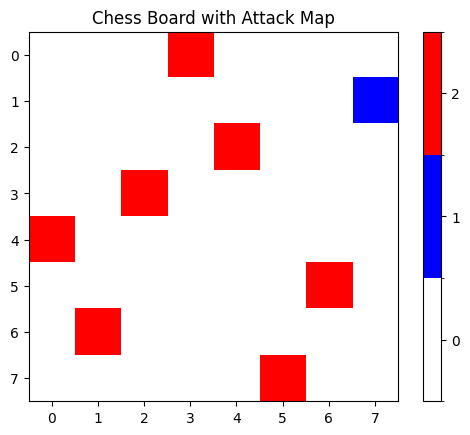

In [181]:
board_idx = 11111
board_to_show = good_boards[board_idx]
queen_coords_to_show = good_queens_coords[board_idx]

attack_board = get_attack_board(board_to_show, queen_coords_to_show)
visualize_chess_board(attack_board)

In [184]:
fact_7 = 2*3*4*5*6*7
N / fact_7

736.0

In [194]:
lens_of_boards = [len(board) for board in good_boards]
print(len(lens_of_boards))
print(lens_of_boards.count(1))

3709440
3709440


In [197]:
736.0/4

184.0

In [65]:
good_queens_coords = []

def put_queen(cur_chess_board, cur_queens_coords: list, first_loop=False):
    if len(cur_chess_board) == 0:
        return {}
    if len(cur_queens_coords) == 7:
        good_queens_coords.append(cur_queens_coords)
        free_cell = cur_chess_board.pop()
        return {}
    
    available_queen_coords = set()
    cur_board_to_copy = cur_chess_board.copy()
    counter = 0
    while cur_chess_board:
        if first_loop:
            counter += 1
            print(f"{counter}")
            
        queen_coord = cur_chess_board.pop()
        available_queen_coords.add(queen_coord)
    
        board = cur_board_to_copy.copy()
        queens_coords = cur_queens_coords.copy()
        
        queens_coords.append(queen_coord)
        i, j = queen_coord
    
        for k in range(8):
            if (i, k) in board:
                board.remove((i, k))
            if (k, j) in board:
                board.remove((k, j))
        
        queen_diagonals_coords = (*straight_diagonals[7 - i + j], *reverse_diagonals[14 - i - j])
        for coords in queen_diagonals_coords:
            if coords in board:
                board.remove(coords)
        
        prev_coords = put_queen(board, queens_coords)
        available_queen_coords = available_queen_coords.union(prev_coords)
    
        for coord in prev_coords:
            if coord in cur_chess_board:
                cur_chess_board.remove(coord)
                
    return available_queen_coords

In [66]:
c_b = chess_board.copy()
put_queen(c_b, [], True)

1
2
3
4
5
6
7
8


{(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7)}

In [69]:
N = len(good_queens_coords)
print(N*5)

790


In [35]:
10272/16

642.0

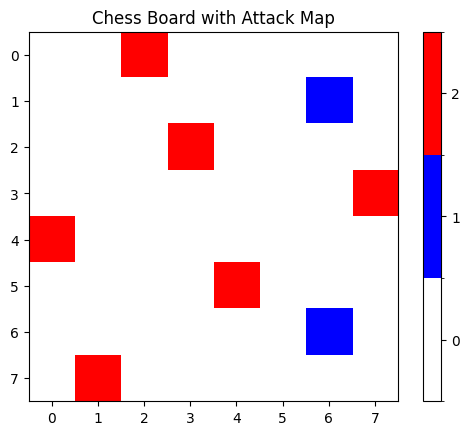

In [14]:
board_idx = 113
board_to_show = good_boards[board_idx]
queen_coords_to_show = good_queens_coords[board_idx]

attack_board = get_attack_board(board_to_show, queen_coords_to_show)
visualize_chess_board(attack_board)